
# Constraints on scalar operators from $B_s\to\mu^+\mu^-$

Plot from the paper [arXiv:1702.05498](https://arxiv.org/abs/1702.05498) by W. Altmannshofer, C. Niehoff, and D. M. Straub

## Imports and notebook settings

In [1]:
import flavio
import flavio.plots
import flavio.statistics.fits
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
flavio.__version__

'0.24'

In [2]:
# Wilson coefficient function
def wc_fct_smeft(CS, CSp):
    return {
            'CS_bsmumu': CS,
            'CP_bsmumu': -CS,
            'CSp_bsmumu': CSp,
            'CPp_bsmumu': CSp,
           }

fast_fit = flavio.statistics.fits.FastFit(
                name = "CS-CSp SMEFT fast fit",
                nuisance_parameters = 'all',
                observables = [ 'BR(Bs->mumu)', 'BR(B0->mumu)', ],
                fit_wc_function = wc_fct_smeft,
                input_scale = 4.8,
                include_measurements = ['LHCb Bs->mumu 2017', 'CMS Bs->mumu 2013'],
            )


## Fast fits: make pseudo measurements

The "fast fits" combine correlated experimental and theoretical uncertainties into one big "pseudo-mesurement". This takes a few minutes. But once this is done, plotting is blazing fast.

In [3]:
%%time
fast_fit.make_measurement()

CPU times: user 35.9 s, sys: 141 ms, total: 36 s
Wall time: 38.7 s


## Constraint on the real parts of $C_S$ and $C_S'$, imposing the SMEFT relation

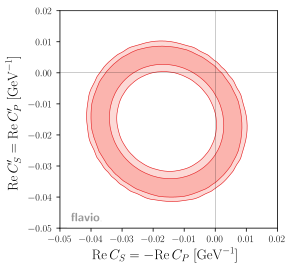

In [12]:
# setting some options
plt.figure(figsize=(4,4))
opt = dict(x_min=-0.05, x_max=0.02, y_min=-0.05, y_max=0.02, n_sigma=(1,2), interpolation_factor=3, steps=30)

# plot!
flavio.plots.likelihood_contour(fast_fit.log_likelihood, col=0, **opt)

# labels, legend, etc.
flavio.plots.flavio_branding(y=0.07, x=0.05)
plt.gca().set_aspect(1)
plt.axhline(0, c='k', lw=0.2)
plt.axvline(0, c='k', lw=0.2)
plt.xlabel(r'$\mathrm{Re}\,C_S=-\mathrm{Re}\,C_P ~[\mathrm{GeV}^{-1}]$')
plt.ylabel(r'$\mathrm{Re}\,C_S^\prime= \mathrm{Re}\,C_P^\prime ~[\mathrm{GeV}^{-1}]$');